# Calculating the average number of bound linkers for FtsZ filament

The assumption is that every monomer of the filament has one linker bound. According to LAMPPS simulations these linkers attach to the membrane as a continuous block. This is currently used in partition function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

In [2]:
r_mono = 4.2   # lenght of monomer in nm
R_cell = 350.0   # Cell radius in nm

In [3]:
def Average_n(N, lp, Ebind0, R0):
    nn = np.arange(0, N+1)
    n = nn[np.newaxis,np.newaxis,:]
    dEbend = r_mono * (n - 1) *  lp * ( (1/R_cell) - (1/R0)  )**2
    dEbind = n * Ebind0
    w_n = (N - n + 1) * np.exp(-(dEbend + dEbind))
    #w_n = comb(N, n) * np.exp(-(dEbend + dEbind))
    w_n[:,:,0] = np.pi*R_cell/(N*r_mono)  #Translational entropy contribution corresponds n=0
    zz = np.sum(w_n,axis=2)
    Z = np.repeat(zz[:, :, np.newaxis], N+1, axis=2)
    p_n = w_n / Z
    avg_n = np.sum(n * p_n,axis=2)
    return avg_n, p_n

In [4]:
def Average_n_Nseries(N, lp, Ebind0, R0):
    maxdim = max(len(np.atleast_1d(lp)),len(np.atleast_1d(Ebind0)),len(np.atleast_1d(R0)))
    avg_n=np.zeros((maxdim,len(N)))
    rel_n=np.zeros(avg_n.shape)
    Pn=np.zeros((maxdim,len(N)+1,len(N)))
    for i, n in enumerate(N):
        av_n, p = Average_n(n, lp, Ebind0, R0)
        avg_n[:,i] = av_n.squeeze()
        Pn[:,0:n+1,i] = p.squeeze()
        if n>1:
            rel_n[:,i]=avg_n[:,i]/float(n)
        else:
            rel_n[:,i]=0.0
    return avg_n, rel_n, Pn

# $E_b$ vs $l_p%$ for for fixed filament length

In [5]:
xx = np.linspace(0,3000.0,num=81)
lpSeries = xx[np.newaxis,:,np.newaxis]
yy = -np.linspace(0,1,num=21)
EbSeries = yy[:,np.newaxis,np.newaxis]
N = 20  # number of monomers
R0 = 150  #intrinsic radius of curvature
Matrix, P = Average_n(N,lpSeries,EbSeries,R0)

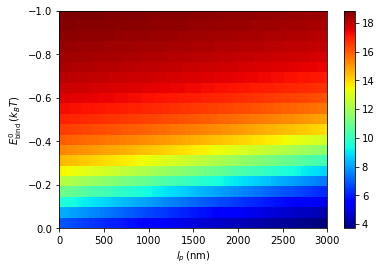

In [6]:
plt.imshow(Matrix, extent=[xx[0], xx[-1], yy[0], yy[-1]], aspect='auto', origin='lower', cmap='jet')
plt.colorbar()

plt.ylabel(r'$E_{\rm bind}^0\,(k_BT)$')
plt.xlabel(r'$l_p\,(\mathrm{nm})$')

#plt.title(r'$N = {}$, $R_0 = {}\,\mathrm{{nm}}$'.format(N[0], R0[0]))

plt.show()

In [7]:
xx = np.linspace(0,3000.0,num=81)
lpSeries = xx[np.newaxis,:,np.newaxis]
yy = -np.linspace(0,1,num=25)
EbSeries = yy[:,np.newaxis,np.newaxis]
N = 20  # number of monomers
R0 = 150  #intrinsic radius of curvature
Matrix, _ = Average_n(N,lpSeries,EbSeries,R0)

In [8]:
P.shape[2]

21

0.9999999999999999
Probability for the free filament 0.06603942673482763


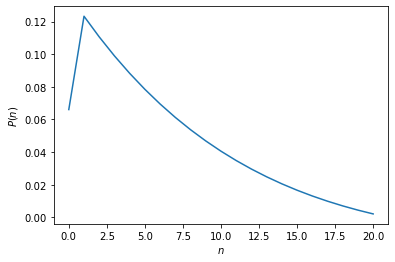

In [9]:
N=20
lp=1200
Eb=-0.2
R0=100
_, P = Average_n(N,lp,Eb,R0)
NN = np.arange(0,N+1)
p=P.squeeze()
plt.plot(NN,p)
plt.xlabel(r'$n$')
plt.ylabel(r'$P(n)$')
plt.show

print(np.sum(p))
print('Probability for the free filament', p[0]) 

# $R_0$ vs $l_p%$ for for fixed filament length

In [10]:
xx = np.linspace(0,20000.0,num=81)
lpSeries = xx[np.newaxis,:,np.newaxis]
yy = np.linspace(50,1500, num=41)
R0Series = yy[:,np.newaxis,np.newaxis]
N = 20  # number of monomers
Eb = -0.5 # the binding energy
Matrix, _ = Average_n(N,lpSeries,Eb,R0Series)

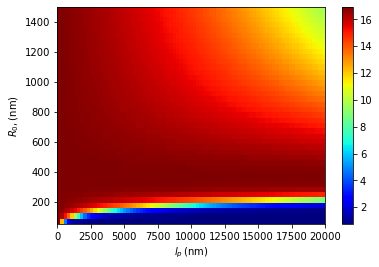

In [11]:
plt.imshow(Matrix, extent=[xx[0], xx[-1], yy[0], yy[-1]], aspect='auto', origin='lower', cmap='jet')
plt.colorbar()

plt.ylabel(r'$R_0,(\mathrm{nm})$')
plt.xlabel(r'$l_p\,(\mathrm{nm})$')

#plt.title(r'$N = {}$, $R_0 = {}\,\mathrm{{nm}}$'.format(N[0], R0[0]))

plt.show()

lp =  10000.0 nm


<function matplotlib.pyplot.show(close=None, block=None)>

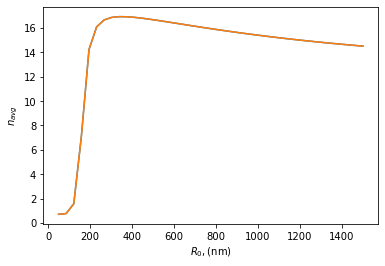

In [12]:
nlp = 40
print('lp = ',lpSeries[0,nlp,0],'nm')
R0Slice,_ = Average_n(N,lpSeries[0,nlp,0],Eb,R0Series)
plt.plot(R0Series[:,0,0],R0Slice)
plt.plot(R0Series[:,0,0], Matrix[:,nlp])
plt.xlabel(r'$R_0,(\mathrm{nm})$')
plt.ylabel(r'$n_{avg}$')
plt.show

The plot is rather asymmetric relative to $R_{cell}$. Binding to less curved surface effectively as likely as to the optimally curved surface

# $N$ vs $l_p%$ for for fixed $E_b$ and $R_0$

In [13]:
Nmax = 20
NSeries = np.arange(1,Nmax)
yy = np.linspace(100,1500, num=41)
lpSeries = yy[:,np.newaxis,np.newaxis]
Eb = -0.5 # the binding energy
R0 = 100
Matrix, RelMatrix, P = Average_n_Nseries(NSeries,lpSeries,Eb,R0)

In [14]:
P.shape

(41, 20, 19)

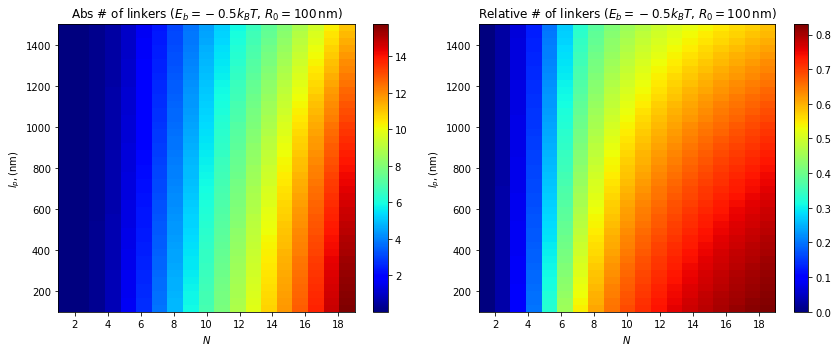

In [15]:
plt.figure(figsize=(12, 5))  # Set the figure size

plt.subplot(1, 2, 1)
plt.imshow(Matrix, extent=[NSeries[0], NSeries[-1], yy[0], yy[-1]], aspect='auto', origin='lower', cmap='jet')
plt.colorbar()

plt.ylabel(r'$l_p,(\mathrm{nm})$')
plt.xlabel(r'$N$')

plt.title(r'Abs # of linkers ($E_b = {} k_BT$, $R_0 = {}\,\mathrm{{nm}}$)'.format(Eb, R0))

plt.subplot(1, 2, 2)
plt.imshow(RelMatrix, extent=[NSeries[0], NSeries[-1], yy[0], yy[-1]], aspect='auto', origin='lower', cmap='jet')
plt.colorbar()

plt.ylabel(r'$l_p,(\mathrm{nm})$')
plt.xlabel(r'$N$')

plt.title(r'Relative # of linkers ($E_b = {} k_BT$, $R_0 = {}\,\mathrm{{nm}}$)'.format(Eb, R0))

plt.tight_layout() 
plt.show()

lp =  [ 205.  800. 1465.] nm


<function matplotlib.pyplot.show(close=None, block=None)>

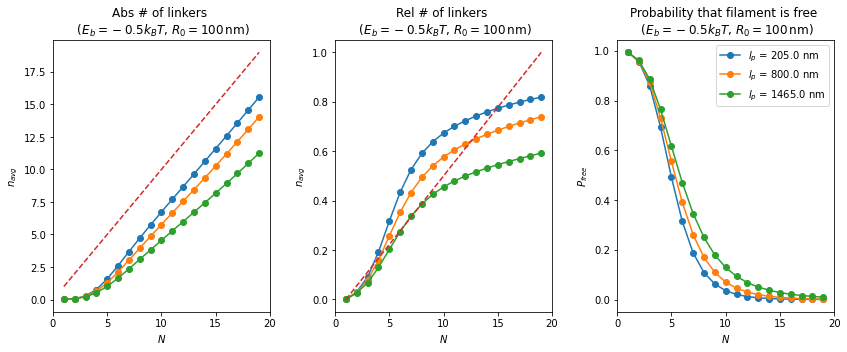

In [23]:
nlp = [3,20,39]
print('lp = ',lpSeries[nlp,0,0],'nm')

fig=plt.figure(figsize=(14, 5))  # Set the figure size

plt.subplot(1, 3, 1)
for ilp in nlp:
    plt.plot(NSeries, Matrix[ilp,:],linestyle='-', marker='o')
plt.plot(NSeries, NSeries,'--')
plt.xlabel(r'$N$')
plt.ylabel(r'$n_{avg}$')
plt.title('Abs # of linkers \n ($E_b = {} k_BT$, $R_0 = {}\,\mathrm{{nm}}$)'.format(Eb, R0))
plt.xlim(NSeries[0]-1, NSeries[-1]+1)

plt.subplot(1, 3, 2)
for ilp in nlp:
    plt.plot(NSeries, RelMatrix[ilp,:],linestyle='-', marker='o')
plt.plot([NSeries[0],NSeries[-1]], [0,1],'--')
plt.xlabel(r'$N$')
plt.ylabel(r'$n_{avg}$')
plt.title('Rel # of linkers \n ($E_b = {} k_BT$, $R_0 = {}\,\mathrm{{nm}}$)'.format(Eb, R0))
plt.xlim(NSeries[0]-1, NSeries[-1]+1)

plt.subplot(1, 3, 3)
for ilp in nlp:
    plt.plot(NSeries, P[ilp,0,:],linestyle='-', marker='o')
#plt.plot(NSeries, 1-Pfree,linestyle='-', marker='o')
plt.xlabel(r'$N$')
plt.ylabel(r'$P_{free}$')
plt.title('Probability that filament is free \n ($E_b = {} k_BT$, $R_0 = {}\,\mathrm{{nm}}$)'.format(Eb, R0))
plt.xlim(NSeries[0]-1, NSeries[-1]+1)
legend_labels = [f'$l_p$ = {lpSeries[n].squeeze()} nm' for n in nlp]
plt.legend(legend_labels)

fig.subplots_adjust(wspace=0.3)

#plt.tight_layout() 
plt.show

The small filaments are not likely attach because their translational entropy disfavors it. 
This is even when not taking into account that they should have smaller number of linkers attached. The latter is a kinetic rather than an equilibrium effect.

In [ ]:
comb(5,0)

# Calculating the probability that there is a continuos block of x linkers in a filament with N monomers and n linkers

In [ ]:
def Pcont(x,n,N):
    """
    Calculate the probability P(x) of having exactly x consecutive monomers attached to the linkers
    
    N (int): Total number of monomers
    n (int): Total number of linkers
    x (int): Number of consecutive monomers attached to linkers
    
    Returns:
    float: The probability P(x).
    """
    # Total configurations
    if N < n or N < x.any() or x.any() > n:
        return 0.0  # Invalid configuration
    
    total_configurations = comb(N, n)
    
    # Middle cases: (N - x - 1) * C(N - x - 2, n - x)
    if N - x.any() - 2 >= n - x.any() >= 0:  # Ensure valid combination
        middle_cases = (N - x - 1) * comb(N - x - 2, n - x)
    else:
        middle_cases = 0

    # Edge cases: 2 * C(N - x - 1, n - x)
    if N - x.any() - 1 >= n - x.any() >= 0:  # Ensure valid combination
        edge_cases = 2 * comb(N - x - 1, n - x)
    else:
        edge_cases = 0

    # Total valid configurations
    valid_configurations = middle_cases + edge_cases

    # Probability
    if total_configurations > 0:
        probability = valid_configurations / total_configurations
    else:
        probability = 0.0
        
    return probability

In [ ]:
N=10
n=5
x=np.arange(1,n+1)
P=Pcont(x,n,N)
total_prob = sum(P)
P /= P[0]
ExpDec = np.exp(-(x-1.0))
plt.semilogy(x, P,'*')
#plt.semilogy(x, ExpDec,'-')
plt.show

In [ ]:
np.sum(P)